Accuracy: 0.803921568627451


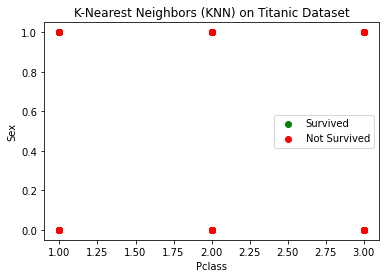

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
frames = [df1, df2]
titanic_data = pd.concat(frames)

# Preprocess the data
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'Survived']]
titanic_data.dropna(inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Normalize the numerical features (Age)
titanic_data['Age'] = (titanic_data['Age'] - titanic_data['Age'].mean()) / titanic_data['Age'].std()

# Split the data into features and labels
X = titanic_data[['Pclass', 'Sex', 'Age']].values
y = titanic_data['Survived'].values

# Define the KNN function
def knn(X_train, y_train, x_test, k):
    distances = np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))
    indices = np.argsort(distances)[:k]
    labels = y_train[indices]
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    predicted_label = unique_labels[np.argmax(label_counts)]
    return predicted_label

# Predict the labels for test data using KNN
k = 5  # Number of nearest neighbors
predictions = []

for i in range(len(X)):
    x_test = X[i]
    y_pred = knn(X[np.arange(len(X)) != i], y[np.arange(len(y)) != i], x_test, k)
    predictions.append(y_pred)

# Calculate the accuracy of the predictions
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# Visualize the results
survived_indices = np.where(y == 1)[0]
not_survived_indices = np.where(y == 0)[0]

plt.scatter(X[survived_indices, 0], X[survived_indices, 1], c='g', label='Survived')
plt.scatter(X[not_survived_indices, 0], X[not_survived_indices, 1], c='r', label='Not Survived')
plt.xlabel('Pclass')
plt.ylabel('Sex')
plt.title('K-Nearest Neighbors (KNN) on Titanic Dataset')
plt.legend()
plt.show()

In [2]:
titanic_data

,Pclass,Sex,Age,Survived
0,3,0,-0.530005,0.0
1,1,1,0.571430,1.0
2,3,1,-0.254646,1.0
3,1,1,0.364911,1.0
4,3,0,0.364911,0.0
...,...,...,...,...
885,3,1,0.640270,0.0
886,2,0,-0.185807,0.0
887,1,1,-0.736524,1.0
889,1,0,-0.254646,1.0
